## Import Resources

In [ ]:
# Importing Dependencies 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1' 


# Basic Preprocessing & Visualization Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import json



# Tensorflow library
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
tfds.disable_progress_bar()

# Checking for GPU
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)


2025-03-13 05:51:54.387857: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 05:51:54.462884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741837914.505393    2732 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741837914.528255    2732 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 05:51:54.604805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Using:
	• TensorFlow version: 2.18.0
	• Running on GPU


I0000 00:00:1741837917.922531    2732 gpu_device.cc:2022] Created device /device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## Load Dataset

In [2]:
# Load the dataset with TensorFlow Datasets.
ds ,info= tfds.load("oxford_flowers102",split=['train','validation','test'],as_supervised=True,with_info=True)

# Createing a training set, a validation set and a test set.

train_set ,validation_set,test_set = ds

# Debuggin info
print(info)

Dataset oxford_flowers102 downloaded and prepared to /home/ahmad/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more in

I0000 00:00:1741837980.019880    2732 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## Explore the Dataset

In [3]:
# Number of examples in each set from the dataset info.
print("train size",info.splits['train'].num_examples)
print("test size",info.splits['test'].num_examples)
print("validation size",info.splits['validation'].num_examples)
# Number of classes in the dataset from the dataset info.
print("data set num of classes : ", info.features['label'].num_classes)

# Numbere of whole dataset samples.
dataset_size = info.splits['train'].num_examples + info.splits['validation'].num_examples+info.splits['test'].num_examples
print("dataset size : ",dataset_size)

train size 1020
test size 6149
validation size 1020
data set num of classes :  102
dataset size :  8189


In [ ]:
# Printing the shape and corresponding label of 3 images in the training set.
count = 1
for img , label in train_set.take(3):
  print(f" Image # {count} shape & label : ({img.shape} , {label})   ")
  count+=1


 Image # 1 shape & label : ((500, 667, 3) , 72)   
 Image # 2 shape & label : ((500, 666, 3) , 84)   
 Image # 3 shape & label : ((670, 500, 3) , 70)   


2025-01-30 17:43:36.724090: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-30 17:43:36.743131: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-01-30 17:49:00.558366: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-30 17:49:00.574695: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


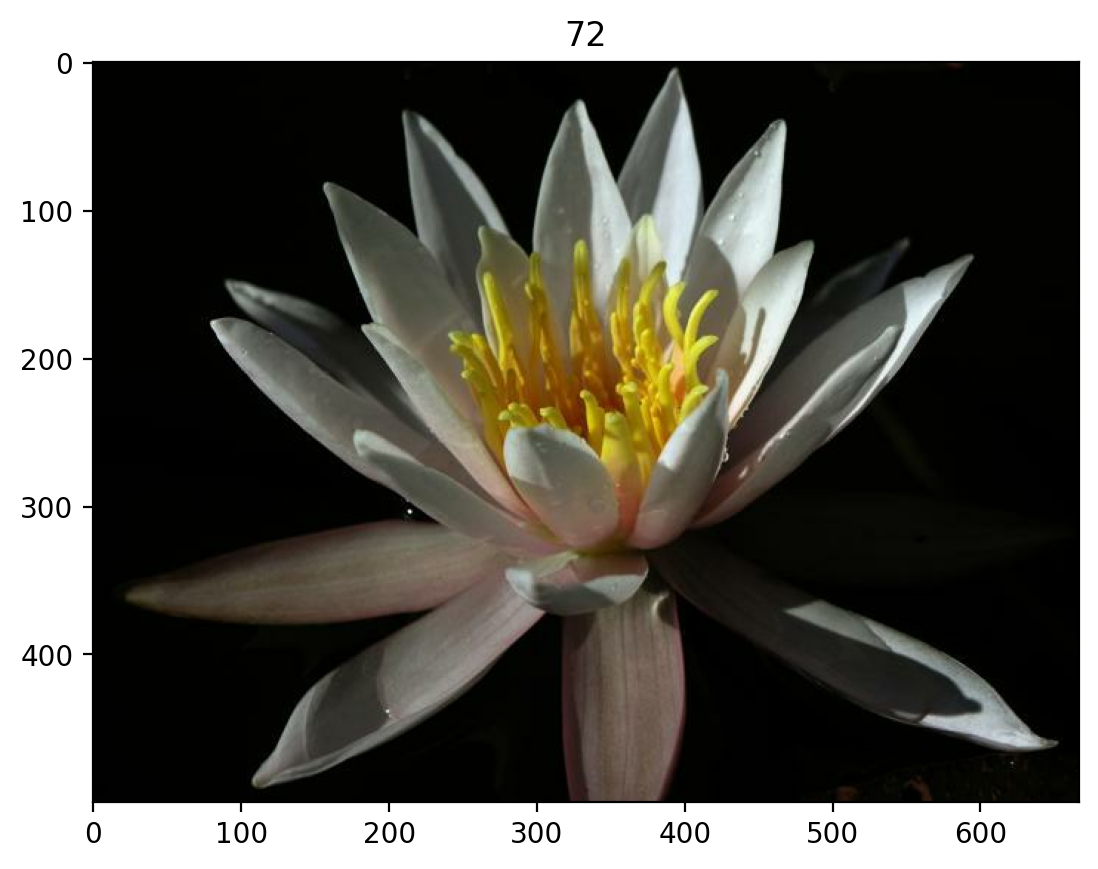

In [ ]:
# Plot 1 image from the training set. 
for img , label in train_set.take(1):
  img = img.numpy().squeeze()
  label = label.numpy()
plt.imshow(img)
plt.title(label)
plt.show()

### Label Mapping


In [ ]:
# Label mapping with json file provided for labels
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
    print(class_names)


{'0': 'pink primrose', '1': 'hard-leaved pocket orchid', '2': 'canterbury bells', '3': 'sweet pea', '4': 'english marigold', '5': 'tiger lily', '6': 'moon orchid', '7': 'bird of paradise', '8': 'monkshood', '9': 'globe thistle', '10': 'snapdragon', '11': "colt's foot", '12': 'king protea', '13': 'spear thistle', '14': 'yellow iris', '15': 'globe-flower', '16': 'purple coneflower', '17': 'peruvian lily', '18': 'balloon flower', '19': 'giant white arum lily', '20': 'fire lily', '21': 'pincushion flower', '22': 'fritillary', '23': 'red ginger', '24': 'grape hyacinth', '25': 'corn poppy', '26': 'prince of wales feathers', '27': 'stemless gentian', '28': 'artichoke', '29': 'sweet william', '30': 'carnation', '31': 'garden phlox', '32': 'love in the mist', '33': 'mexican aster', '34': 'alpine sea holly', '35': 'ruby-lipped cattleya', '36': 'cape flower', '37': 'great masterwort', '38': 'siam tulip', '39': 'lenten rose', '40': 'barbeton daisy', '41': 'daffodil', '42': 'sword lily', '43': 'poi

2025-01-30 17:49:02.971193: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


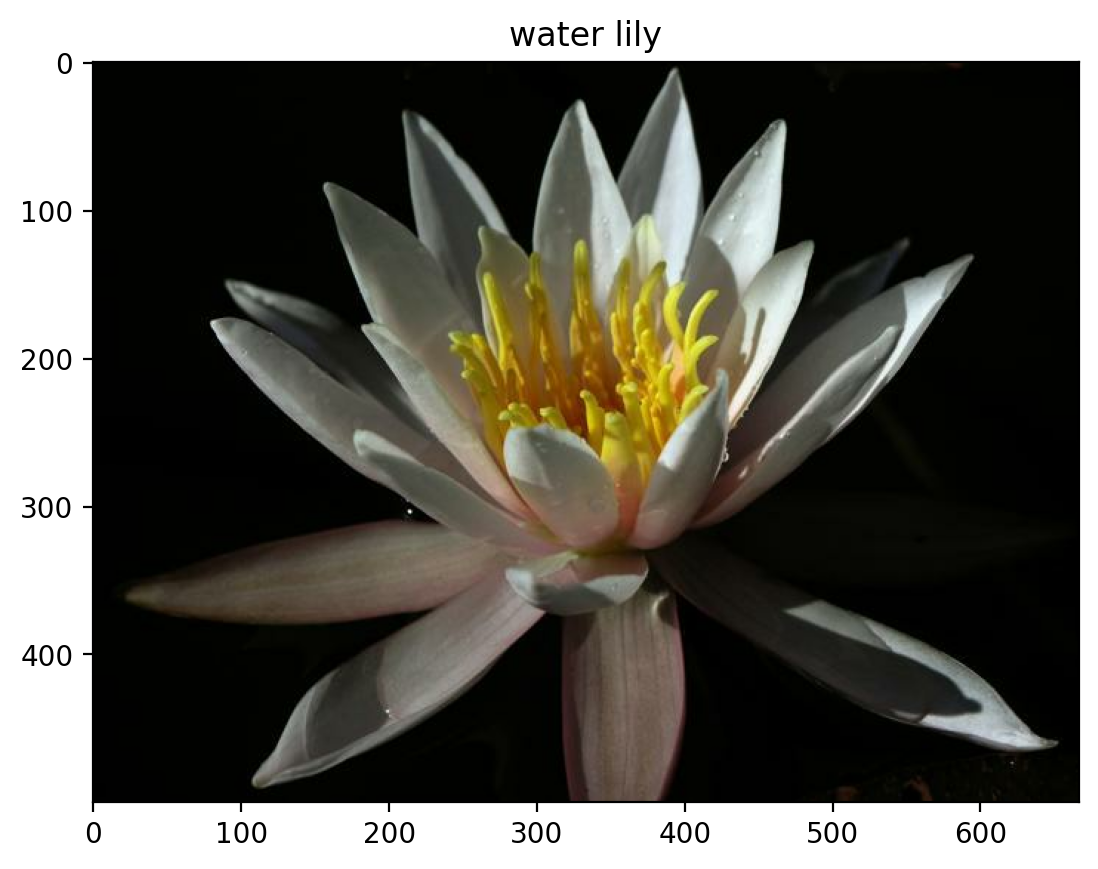

In [ ]:
#  Plotting another  image from the training set.
for img , label in train_set.take(1):
  img = img.numpy().squeeze()
  label = label.numpy()
plt.imshow(img)

plt.title(class_names[str(label)])
plt.show()



## Create Pipeline

In [ ]:
#  Create a pipeline for each set.
batch_size= 64
img_size = 224
train_examples_size = len(train_set)

def format_img(img,label):
  img = tf.cast(img,tf.float32)
  img = tf.image.resize(img,(img_size,img_size))
  img/=255
  return img , label

train_batches = train_set.shuffle(train_examples_size //4).map(format_img).batch(batch_size).prefetch(1)
val_batches = validation_set.map(format_img).batch(batch_size).prefetch(1)
test_batches = test_set.map(format_img).batch(batch_size).prefetch(1)
print(train_batches)
print(test_batches)
print(val_batches)



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


# Build and Train the Classifier


In [ ]:
# Building and training the network classifier.
URL = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,input_shape=(img_size,img_size,3))
feature_extractor.trainable = False
model = tf.keras.Sequential([
          feature_extractor,
          tf.keras.layers.Dense(102, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2731616   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2862278 (10.92 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2731616 (10.42 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 40

# Early Stopping Definition (wait for 5 epochs with no improvments)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=val_batches,
                    callbacks = [early_stopping])

Epoch 1/40
16/16 [==============================] - 4s 145ms/step - loss: 2.1026 - accuracy: 0.7627 - val_loss: 2.0312 - val_accuracy: 0.7363
Epoch 2/40
16/16 [==============================] - 2s 109ms/step - loss: 1.3010 - accuracy: 0.9265 - val_loss: 1.5817 - val_accuracy: 0.7951
Epoch 3/40
16/16 [==============================] - 2s 116ms/step - loss: 0.8857 - accuracy: 0.9549 - val_loss: 1.3078 - val_accuracy: 0.8294
Epoch 4/40
16/16 [==============================] - 2s 107ms/step - loss: 0.6326 - accuracy: 0.9775 - val_loss: 1.1344 - val_accuracy: 0.8431
Epoch 5/40
16/16 [==============================] - 2s 106ms/step - loss: 0.4732 - accuracy: 0.9873 - val_loss: 1.0220 - val_accuracy: 0.8451
Epoch 6/40
16/16 [==============================] - 2s 107ms/step - loss: 0.3683 - accuracy: 0.9922 - val_loss: 0.9379 - val_accuracy: 0.8520
Epoch 7/40
16/16 [==============================] - 2s 99ms/step - loss: 0.2942 - accuracy: 0.9951 - val_loss: 0.8770 - val_accuracy: 0.8559
Epoch 8

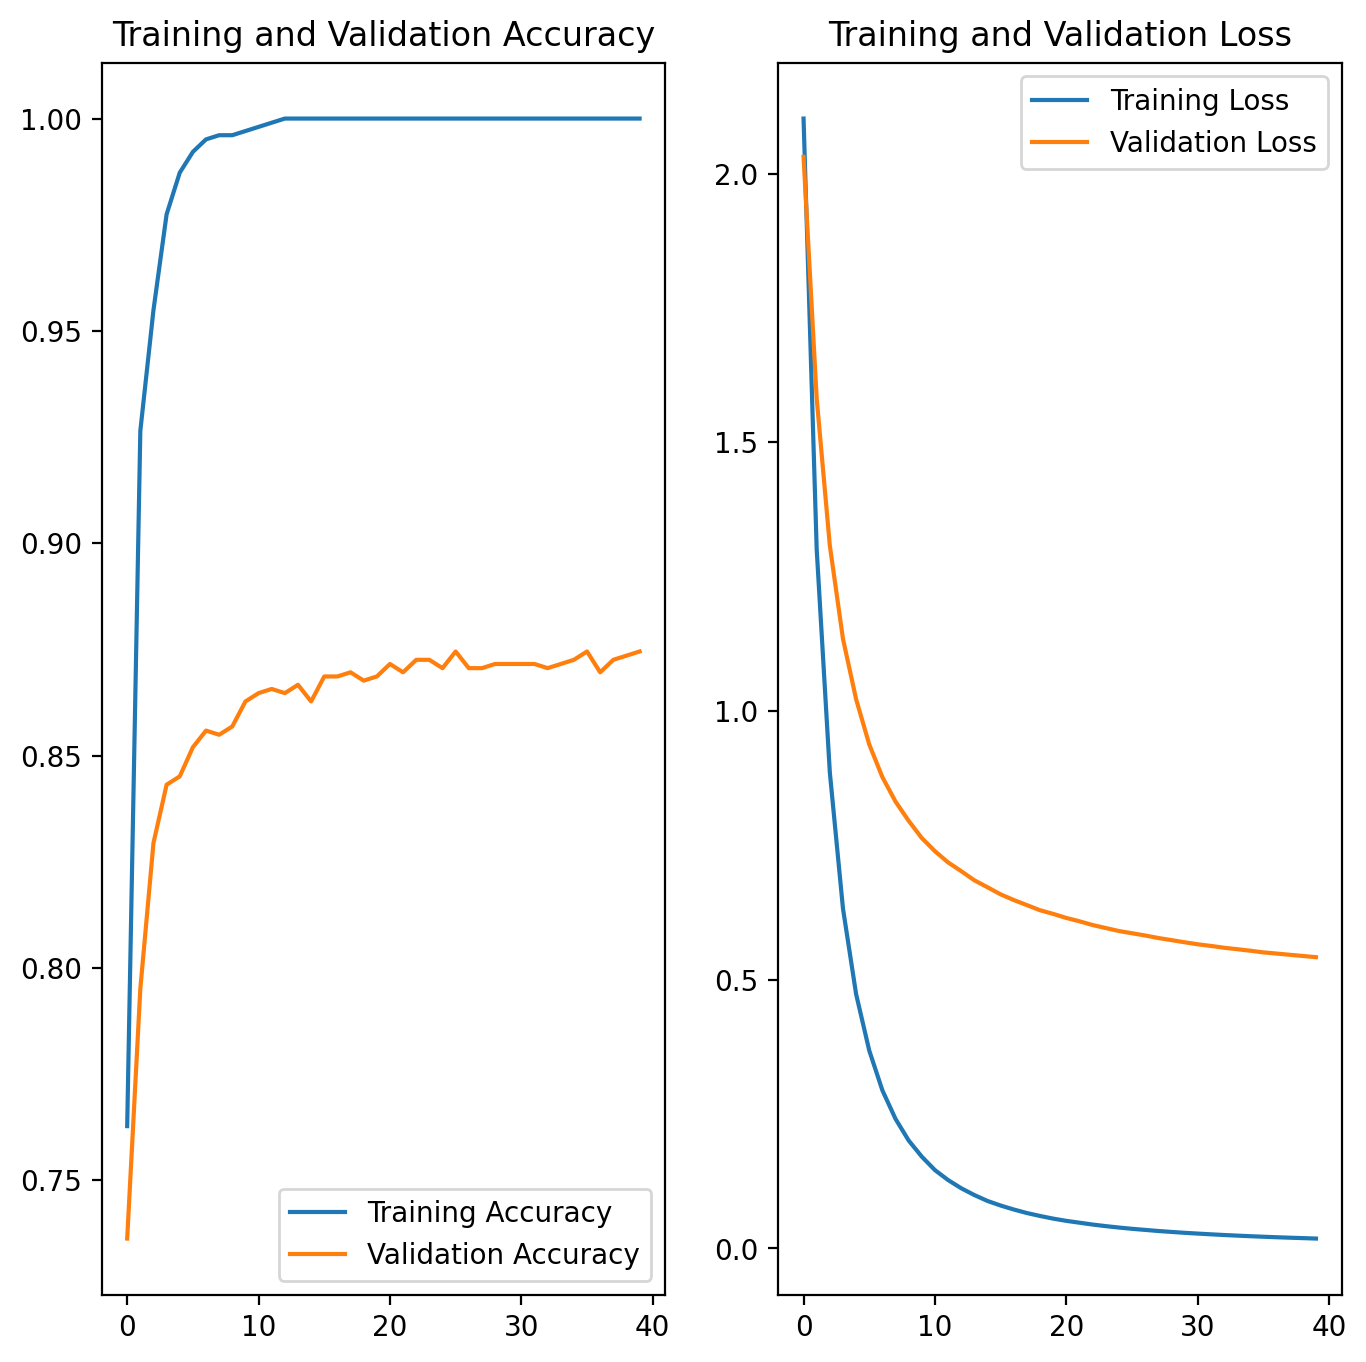

In [ ]:
#  Plotting the loss and accuracy values achieved during training for the training and validation set.
train_accuracy =  history.history["accuracy"]
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(train_accuracy))

# plot 1
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plot 2
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Testing the Network


In [ ]:
# Printing the loss and accuracy values achieved on the entire test set.
loss_test , accuracy_test = model.evaluate(test_batches)
print("Loss of test_set  ",loss_test)
print("Accuracy of test_set",accuracy_test)


97/97 [==============================] - 5s 50ms/step - loss: 0.6297 - accuracy: 0.8429
Loss of test_set   0.6297168731689453
Accuracy of test_set 0.8429012894630432


## Save the Model


In [ ]:
# Saving trained model as a Keras model.
model_path = "model.keras"
model.save(model_path)


## Load the Keras Model


In [ ]:

loaded_model = tf.keras.models.load_model(model_path,custom_objects={'KerasLayer':hub.KerasLayer})


# Inference for Classification



In [ ]:
#  process_image function
def process_image(img):
  # Converting an image into a Tensor
  img = tf.convert_to_tensor(img,dtype=tf.float32)
  img = tf.image.resize(img, (img_size, img_size))
  print(img)

  # Normalization
  img = tf.cast(img, tf.float32)
  img /= 255.0

  # Converting back to numpy array
  final_img = img.numpy()
  return final_img




Checking `process_image` function  (there are 4 provided  images in the `./test_images/` folder):

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function.

tf.Tensor(
[[[ 34.589287  35.589287  30.589285]
  [ 29.249681  30.249681  25.249681]
  [ 26.126913  27.126913  22.126913]
  ...
  [ 19.080353  20.080353  15.080353]
  [ 17.151464  17.151464  15.151465]
  [ 15.616058  15.616058  13.616058]]

 [[ 33.097897  34.097897  29.097895]
  [ 30.677614  31.677614  26.677614]
  [ 35.421238  36.421238  31.421238]
  ...
  [ 16.54464   17.54464   12.544639]
  [ 17.312492  17.312492  15.312491]
  [ 15.080344  15.080344  13.080344]]

 [[ 37.401787  38.401787  33.401787]
  [ 42.26786   43.26786   38.26786 ]
  [ 42.82972   43.82972   38.82972 ]
  ...
  [ 15.017219  16.017218  11.017219]
  [ 13.198021  13.198021  11.198021]
  [ 12.958863  12.958863  10.958863]]

 ...

 [[171.74315   58.743153  25.42871 ]
  [177.71269   63.712696  28.016268]
  [181.34825   63.40189   27.214355]
  ...
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]]

 [[177.        65.        28.      ]
  [178.91869   64.918686  

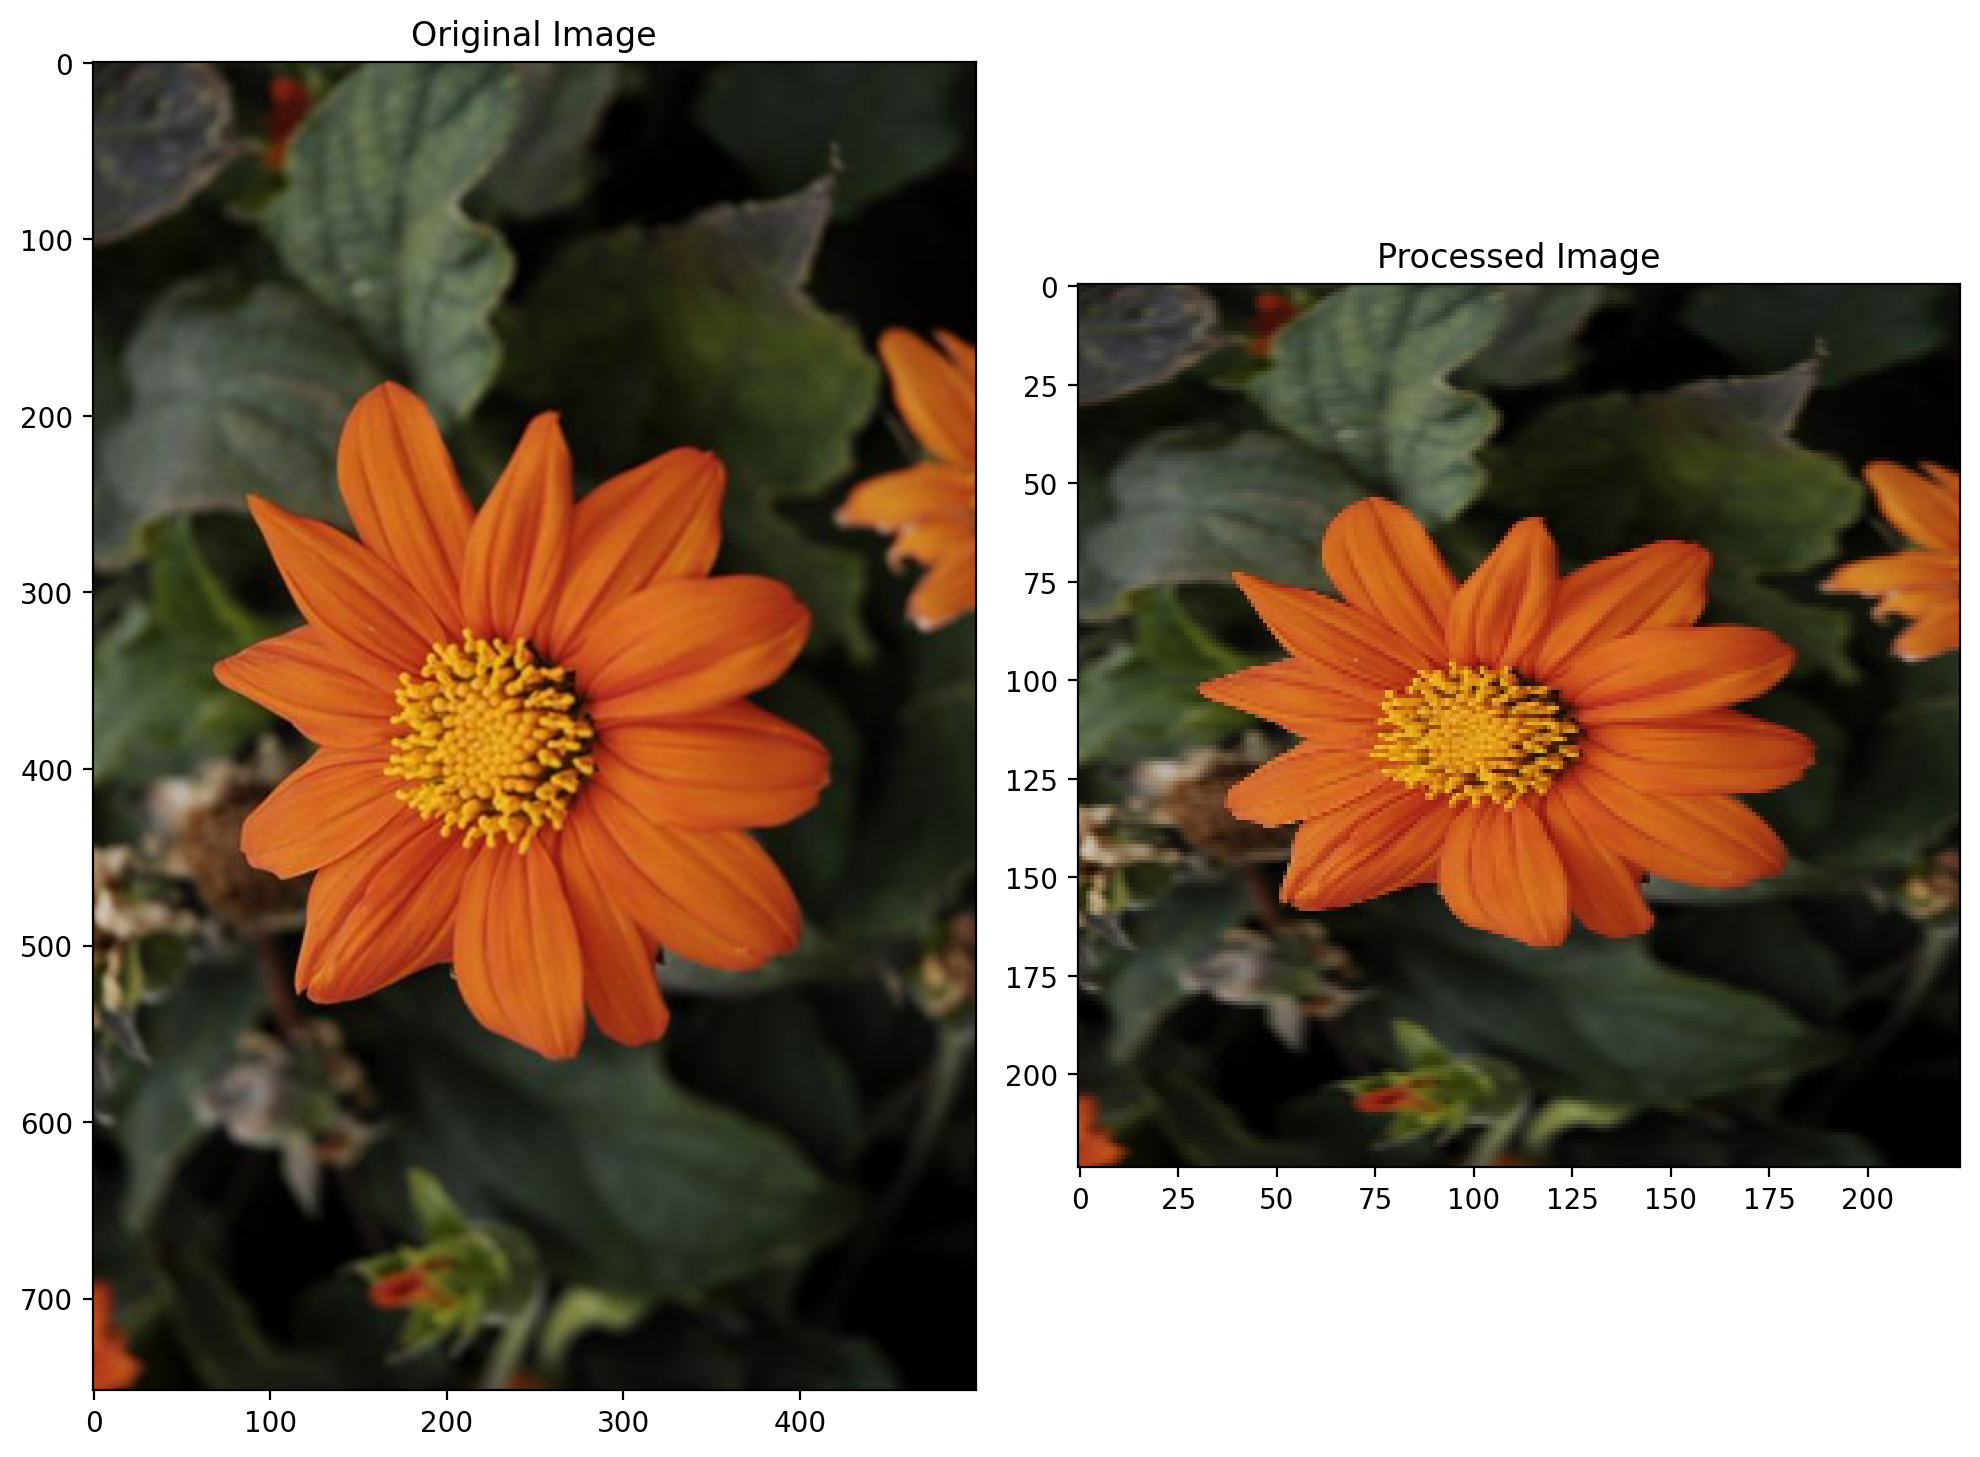

In [ ]:
from PIL import Image

image_path = './test_images/orange_dahlia.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [ ]:
#  prediction function
def predict(img_path,model,top_k):
  with Image.open(img_path) as im:
    # Image Processing before prediction
    img_converted = np.asarray(im)
    img_processed = process_image(img_converted)
    final_img = np.expand_dims(img_processed,axis=0)
    #print("Image Shape : ",final_img.shape)

    # Array of classes probs
    probs=model.predict(final_img)

    # Getting top K classes
    top_k_labels = np.argsort(probs[0])[-top_k:][::-1]
    top_k_class_names = []
    for label in top_k_labels:
      top_k_class_names.append(class_names[str(label)])


    top_k_probs = probs[0][top_k_labels]

    return top_k_probs,top_k_class_names



# Sanity Check



tf.Tensor(
[[[115.89285  122.89285   68.89285 ]
  [111.8125   120.8125    67.8125  ]
  [106.66258  116.66258   63.742943]
  ...
  [107.       111.        52.      ]
  [106.54462  110.54462   49.544617]
  [100.23212  104.23212   43.232117]]

 [[112.147316 119.147316  67.147316]
  [107.06696  116.06696   63.066963]
  [100.66402  110.66402   57.961975]
  ...
  [109.31696  113.08035   54.553566]
  [109.01783  112.30801   53.544617]
  [102.32588  105.61606   46.852665]]

 [[108.20089  115.20089   63.92857 ]
  [102.27232  110.54465   59.      ]
  [ 95.65625  105.65625   53.773197]
  ...
  [113.20492  114.74956   57.74956 ]
  [112.27229  113.27229   55.999973]
  [105.511505 106.511505  49.23918 ]]

 ...

 [[ 66.56067   87.10535   38.10535 ]
  [ 67.93092   87.74794   41.4756  ]
  [ 47.004444  69.04821   21.865612]
  ...
  [ 99.1611   133.1611    46.1611  ]
  [ 99.38621  131.3862    46.386208]
  [ 98.36986  130.36986   45.36986 ]]

 [[ 64.55793   86.55793   37.55793 ]
  [ 64.55343   86.55343   

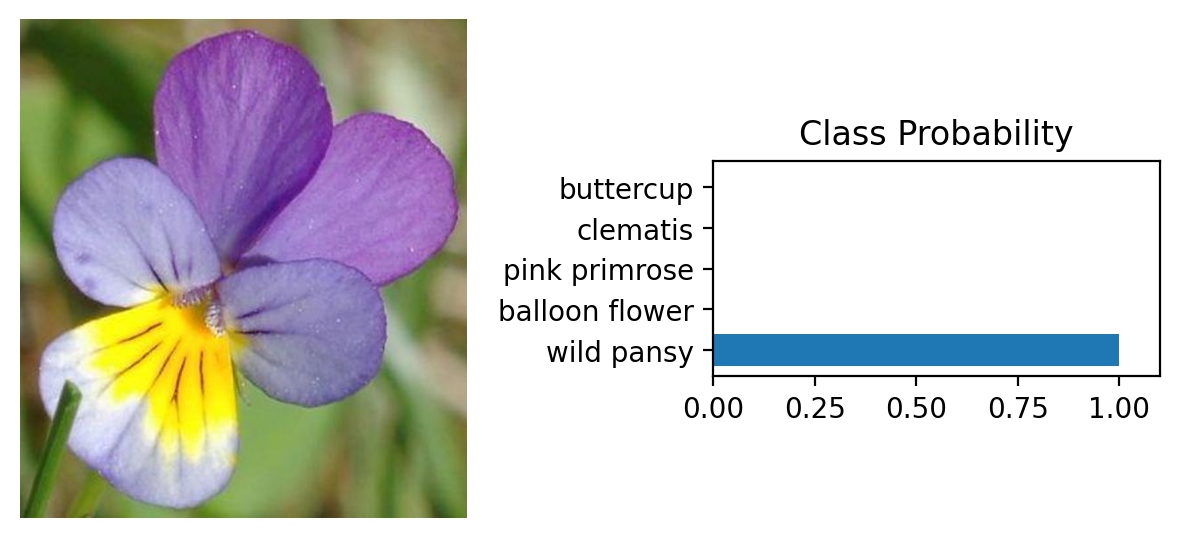

In [ ]:
#  Plotting the input image along with the top k classes

test_img_path = "./test_images/wild_pansy.jpg"
probs,classes = predict(test_img_path,loaded_model,5)

with Image.open(test_img_path) as im:
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    
    ax1.imshow(im)
    ax1.axis('off')
    
    # Plotting the class probabilities
    ax2.barh(range(5), probs, align='center')
    ax2.set_aspect(0.1)
    ax2.set_yticks(range(5))
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()
    plt.show()





In [ ]:
print(probs)


['wild pansy', 'balloon flower', 'pink primrose', 'clematis', 'buttercup']
